In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None

In [2]:
import os
os.listdir("../input/zillow-prize-1")

['properties_2016.csv',
 'sample_submission.csv',
 'properties_2017.csv',
 'train_2017.csv',
 'train_2016_v2.csv',
 'zillow_data_dictionary.xlsx']

In [3]:
train_df = pd.read_csv('../input/zillow-prize-1/train_2017.csv', parse_dates=["transactiondate"])
train_df.head()

,parcelid,logerror,transactiondate
0,14297519,0.025595,2017-01-01
1,17052889,0.055619,2017-01-01
2,14186244,0.005383,2017-01-01
3,12177905,-0.103410,2017-01-01
4,10887214,0.006940,2017-01-01


In [4]:
train_df.shape

(77613, 3)

In [5]:
train_df.logerror.values

array([0.0255949 , 0.05561909, 0.00538285, ..., 0.01320861, 0.03712879,
       0.00720394])

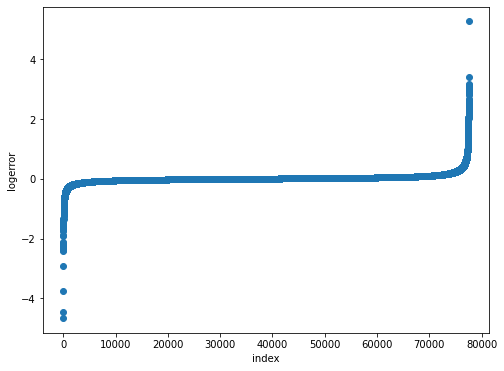

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.logerror.values))
plt.xlabel('index')
plt.ylabel('logerror')
plt.show()

Identify and replace the outliers

In [7]:
upper_limit = np.percentile(train_df.logerror.values, 99)
lower_limit = np.percentile(train_df.logerror.values, 1)
upper_limit, lower_limit

(0.5342337969890008, -0.3198744301782)

Replace the outlier vals with upper and lower limit vals

In [8]:
train_df.loc[train_df['logerror'] > upper_limit, 'logerror'] = upper_limit
train_df.loc[train_df['logerror'] < lower_limit, 'logerror'] = lower_limit

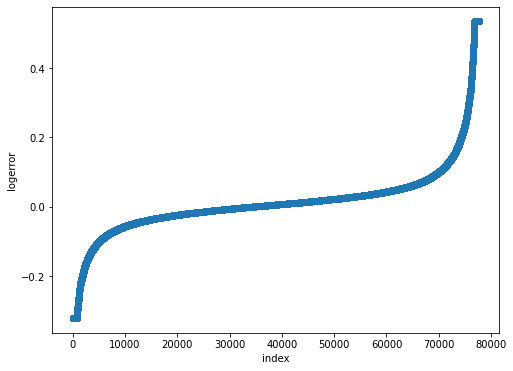

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.logerror.values))
plt.xlabel('index')
plt.ylabel('logerror')
plt.show()

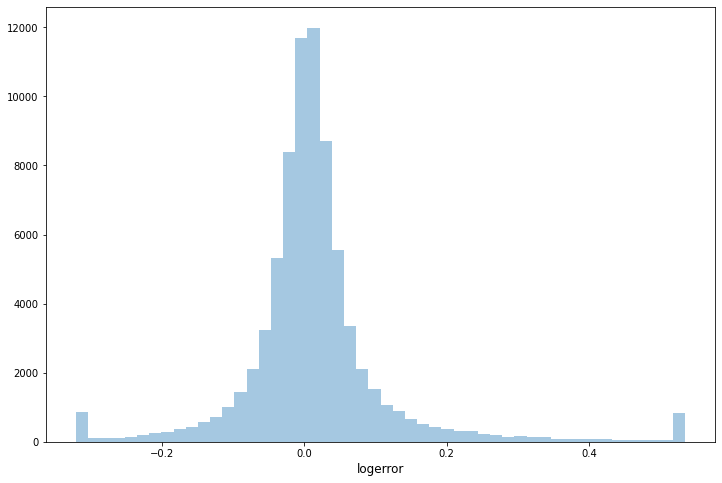

In [10]:
plt.figure(figsize=(12, 8))
sns.distplot(train_df.logerror.values, bins=50, kde=False)
plt.xlabel('logerror', fontsize=12)
plt.show()

Normal distribution obtained.

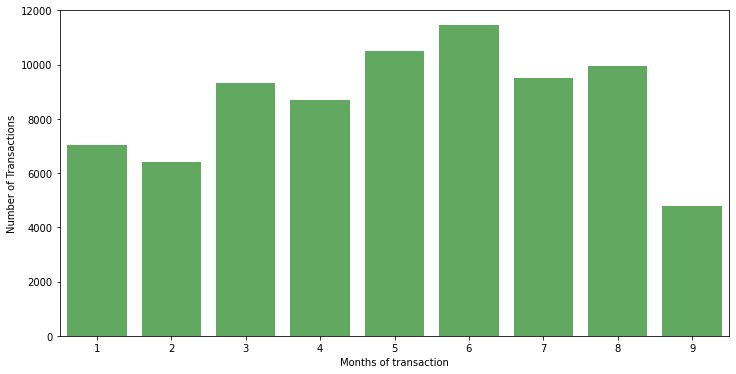

In [11]:
train_df['transaction_month'] = train_df['transactiondate'].dt.month

index_of_months = train_df['transaction_month'].value_counts().index
unique_months_vals = train_df['transaction_month'].value_counts().values

plt.figure(figsize=(12, 6))
sns.barplot(index_of_months, unique_months_vals, alpha=0.8, color=color[2])
plt.xlabel('Months of transaction')
plt.ylabel('Number of Transactions')
plt.show()

In [12]:
temp_df = train_df['parcelid'].value_counts().reset_index()
temp_df['parcelid'].value_counts()

1    77218
2      193
3        3
Name: parcelid, dtype: int64

After counting appearance of each parcel id.
It is seen that most parcelid appear only once in the dataset

In [13]:
prop_df = pd.read_csv("../input/zillow-prize-1/properties_2017.csv")
prop_df.shape

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2985217, 58)

In [14]:
prop_df.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2016.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,5.0,NaN,NaN,NaN,...,1.0,NaN,660680.0,1434941.0,2016.0,774261.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,6.0,NaN,NaN,...,1.0,NaN,580059.0,1174475.0,2016.0,594416.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,1.0,NaN,196751.0,440101.0,2016.0,243350.0,5725.17,NaN,NaN,NaN


In [15]:
prop_df.isnull().sum().reset_index()

,index,0
0,parcelid,0
1,airconditioningtypeid,2169855
2,architecturalstyletypeid,2979156
3,basementsqft,2983590
4,bathroomcnt,2957
5,bedroomcnt,2945
6,buildingclasstypeid,2972486
7,buildingqualitytypeid,1043822
8,calculatedbathnbr,117156
9,decktypeid,2967838


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


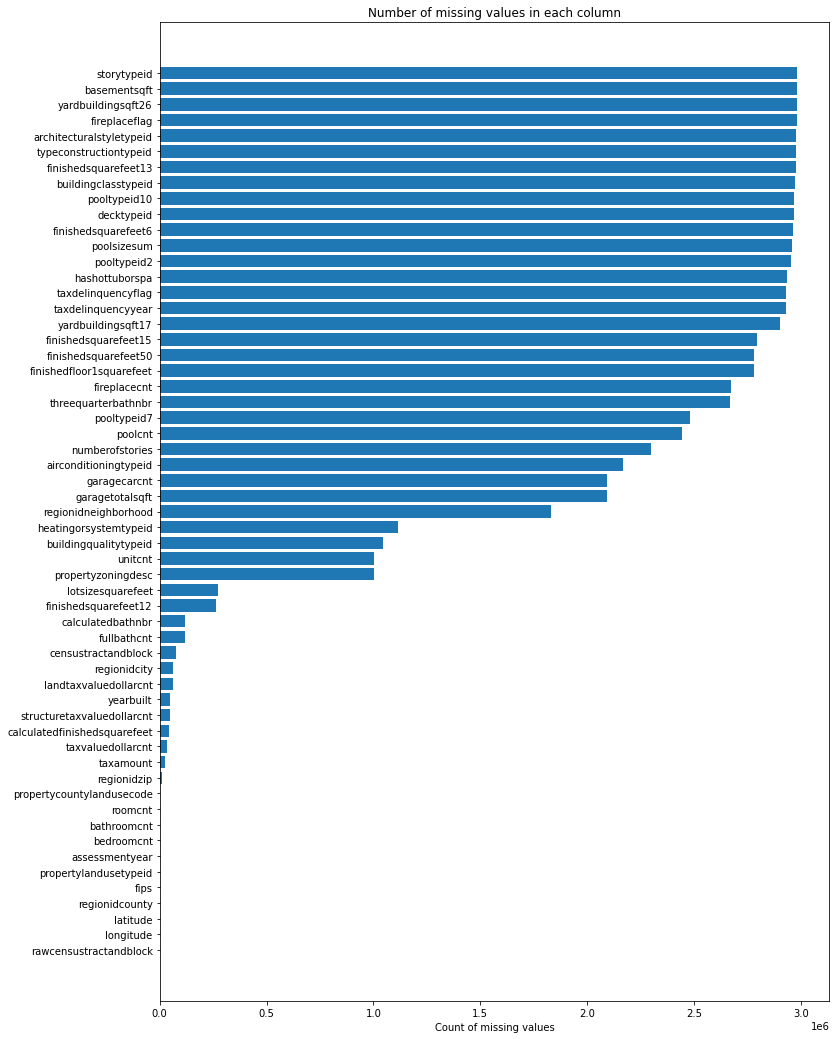

In [16]:
missing_df = prop_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']

missing_df = missing_df.ix[missing_df['missing_count'] > 0]
missing_df = missing_df.sort_values(by='missing_count')

ind = np.arange(missing_df.shape[0])
fig, ax = plt.subplots(figsize=(12, 18))
rects = ax.barh(ind, missing_df.missing_count.values)
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:2272: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 864x864 with 0 Axes>

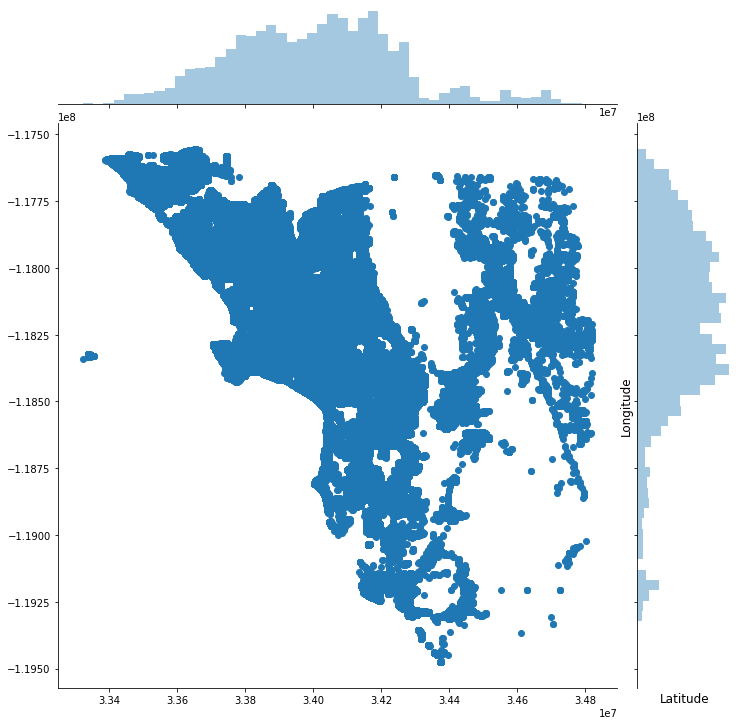

In [17]:
plt.figure(figsize=(12, 12))
sns.jointplot(x = prop_df.latitude.values, y = prop_df.longitude.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

In [18]:
train_df = pd.merge(train_df, prop_df, on='parcelid', how='left')
train_df.head()

,parcelid,logerror,transactiondate,transaction_month,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,14297519,0.025595,2017-01-01,1,NaN,NaN,NaN,3.5,4.0,NaN,...,NaN,NaN,485713.0,1023282.0,2016.0,537569.0,11013.72,NaN,NaN,6.059063e+13
1,17052889,0.055619,2017-01-01,1,NaN,NaN,NaN,1.0,2.0,NaN,...,1.0,NaN,88000.0,464000.0,2016.0,376000.0,5672.48,NaN,NaN,6.111001e+13
2,14186244,0.005383,2017-01-01,1,NaN,NaN,NaN,2.0,3.0,NaN,...,1.0,NaN,85289.0,564778.0,2016.0,479489.0,6488.30,NaN,NaN,6.059022e+13
3,12177905,-0.103410,2017-01-01,1,NaN,NaN,NaN,3.0,4.0,NaN,...,NaN,NaN,108918.0,145143.0,2016.0,36225.0,1777.51,NaN,NaN,6.037300e+13
4,10887214,0.006940,2017-01-01,1,1.0,NaN,NaN,3.0,3.0,NaN,...,NaN,NaN,73681.0,119407.0,2016.0,45726.0,1533.89,NaN,NaN,6.037124e+13


In [19]:
pd.options.display.max_rows = 65

dtype_df = train_df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df

,Count,Column Type
0,parcelid,int64
1,logerror,float64
2,transactiondate,datetime64[ns]
3,transaction_month,int64
4,airconditioningtypeid,float64
5,architecturalstyletypeid,float64
6,basementsqft,float64
7,bathroomcnt,float64
8,bedroomcnt,float64
9,buildingclasstypeid,float64


Almost all are float variables with few object (categorical) variables

In [20]:
dtype_df.groupby("Column Type").count().reset_index()

,Column Type,Count
0,int64,2
1,float64,53
2,datetime64[ns],1
3,object,5


In [21]:
train_df.mean(axis=0)

parcelid                        1.300781e+07
logerror                        1.442724e-02
transaction_month               5.061575e+00
airconditioningtypeid           1.812013e+00
architecturalstyletypeid        7.386473e+00
basementsqft                    6.797200e+02
bathroomcnt                     2.298496e+00
bedroomcnt                      3.053223e+00
buildingclasstypeid             3.933333e+00
buildingqualitytypeid           6.533779e+00
calculatedbathnbr               2.316392e+00
decktypeid                      6.600000e+01
finishedfloor1squarefeet        1.366165e+03
calculatedfinishedsquarefeet    1.784935e+03
finishedsquarefeet12            1.760285e+03
finishedsquarefeet13            1.388762e+03
finishedsquarefeet15            2.354491e+03
finishedsquarefeet50            1.381389e+03
finishedsquarefeet6             2.082500e+03
fips                            6.048814e+03
fireplacecnt                    1.191217e+00
fullbathcnt                     2.250107e+00
garagecarc

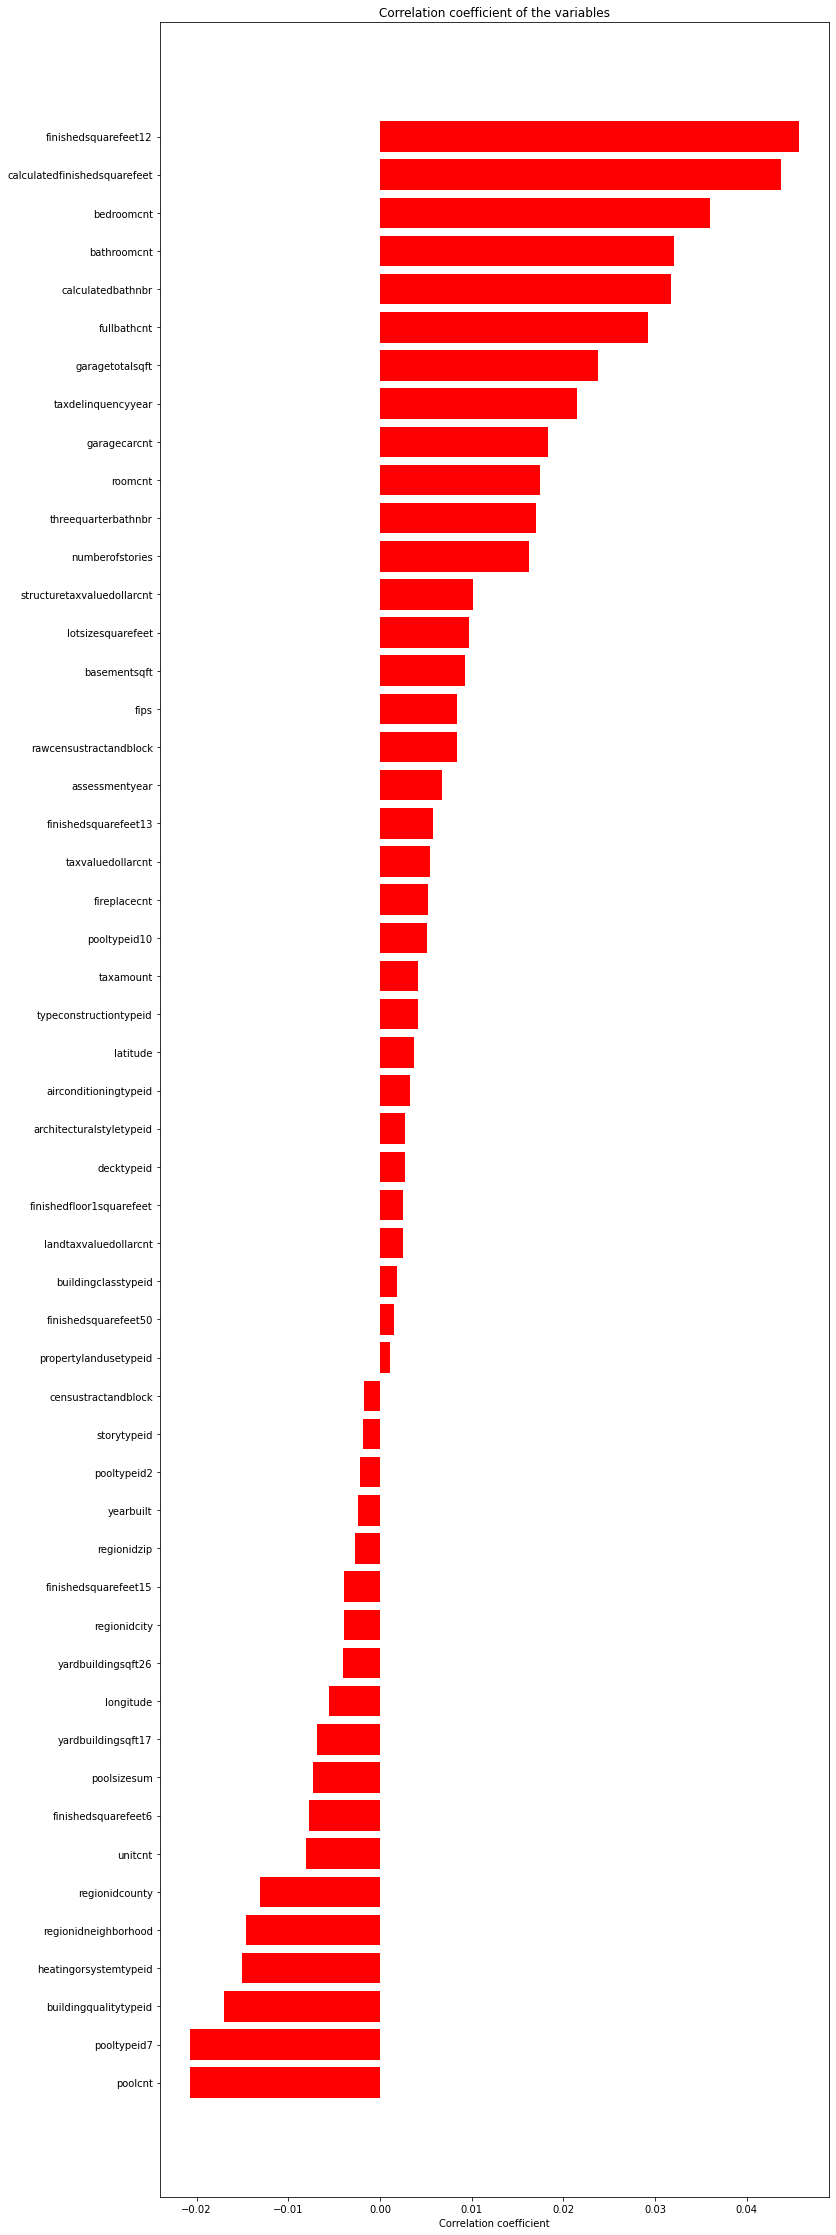

In [22]:
train_df = train_df.fillna(0)

x_cols = [col for col in train_df.columns if col not in ['logerror'] if train_df[col].dtype == 'float64']

labels = []
values = []

# check corr of each col wrt 'logerror' col
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(train_df[col].values, train_df.logerror.values)[0,1])

corr_df = pd.DataFrame({'col_labels': labels, 'corr_values': values})
corr_df = corr_df.sort_values(by='corr_values')

ind = np.arange(len(labels))
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='r')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient of the variables")
plt.show()

There are few variables at the top of this graph without any correlation values.

In [23]:
corr_zero_cols = ['assessmentyear', 'storytypeid', 'pooltypeid2', 'pooltypeid7', 'pooltypeid10', 'poolcnt', 'decktypeid', 'buildingclasstypeid']

for col in corr_zero_cols:
    print(col, train_df[col].nunique())

assessmentyear 2
storytypeid 2
pooltypeid2 2
pooltypeid7 2
pooltypeid10 2
poolcnt 2
decktypeid 2
buildingclasstypeid 3


Let us take the variables with high correlation values 

In [24]:
corr_df.loc[(corr_df['corr_values'] > 0.02) | (corr_df['corr_values'] < -0.01), ('col_labels', 'corr_values')]

,col_labels,corr_values
25,poolcnt,-0.020697
29,pooltypeid7,-0.020678
6,buildingqualitytypeid,-0.017058
21,heatingorsystemtypeid,-0.015093
34,regionidneighborhood,-0.014559
33,regionidcounty,-0.013061
50,taxdelinquencyyear,0.021457
20,garagetotalsqft,0.023787
18,fullbathcnt,0.029284
7,calculatedbathnbr,0.031791


In [25]:
corr_df_sel = corr_df.ix[(corr_df['corr_values']>0.02) | (corr_df['corr_values'] < -0.01)]
corr_df_sel

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,col_labels,corr_values
25,poolcnt,-0.020697
29,pooltypeid7,-0.020678
6,buildingqualitytypeid,-0.017058
21,heatingorsystemtypeid,-0.015093
34,regionidneighborhood,-0.014559
33,regionidcounty,-0.013061
50,taxdelinquencyyear,0.021457
20,garagetotalsqft,0.023787
18,fullbathcnt,0.029284
7,calculatedbathnbr,0.031791


Now to find corr among cols which are highly correlated to 'logerror' col

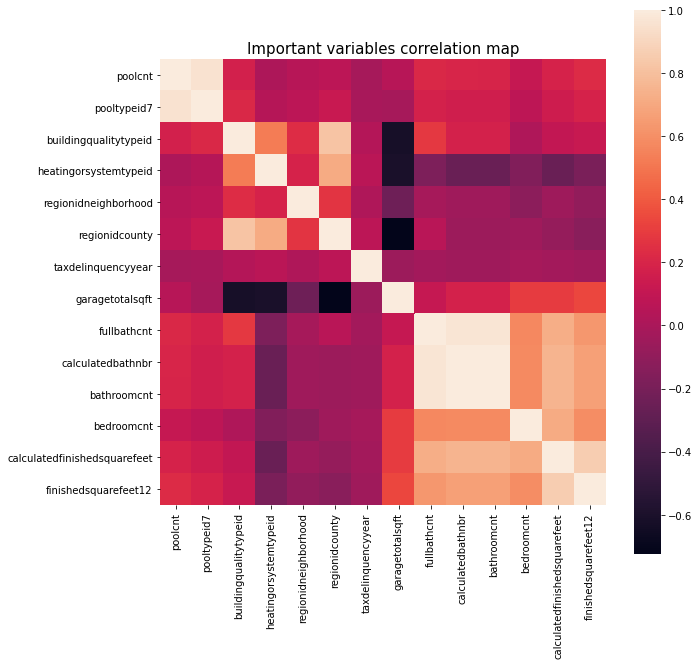

In [26]:
cols_to_use = corr_df_sel.col_labels.tolist()

temp_df = train_df[cols_to_use]
corrmat = temp_df.corr(method='spearman')

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, vmax=1., square=True)
plt.title("Important variables correlation map", fontsize=15)
plt.show()

The important variables themselves are very highly correlated.

In [27]:
cols_to_use

['poolcnt',
 'pooltypeid7',
 'buildingqualitytypeid',
 'heatingorsystemtypeid',
 'regionidneighborhood',
 'regionidcounty',
 'taxdelinquencyyear',
 'garagetotalsqft',
 'fullbathcnt',
 'calculatedbathnbr',
 'bathroomcnt',
 'bedroomcnt',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12']

Now visualizing each cols against 'logerror' col

<Figure size 864x864 with 0 Axes>

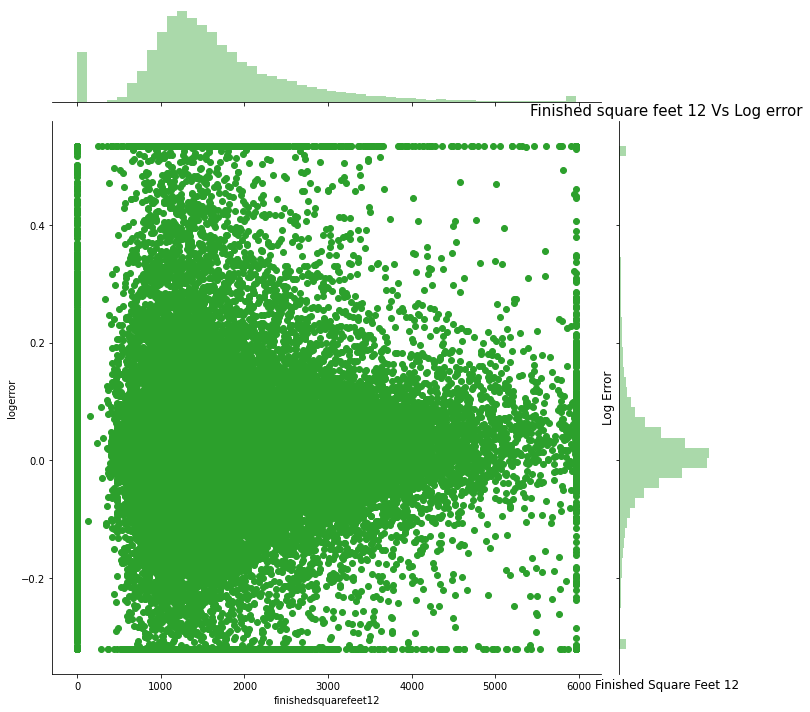

In [46]:
col = 'finishedsquarefeet12'

upper_limit = np.percentile(train_df[col].values, 99.5)
lower_limit = np.percentile(train_df[col].values, 0.5)

train_df.loc[train_df[col] > upper_limit, col] = upper_limit
train_df.loc[train_df[col] < lower_limit, col] = lower_limit

# train_df[col].ix[train_df[col] > upper_limit] = upper_limit
# train_df[col].ix[train_df[col] < lower_limit] = lower_limit

plt.figure(figsize=(12,12))
sns.jointplot(col, 'logerror', data = train_df, size=10, color=color[2])
plt.ylabel('Log Error', fontsize=12)
plt.xlabel('Finished Square Feet 12', fontsize=12)
plt.title("Finished square feet 12 Vs Log error", fontsize=15)
plt.show()

Seems the range of logerror narrows down with increase in finished square feet 12 variable. Probably larger houses are easy to predict

<Figure size 864x864 with 0 Axes>

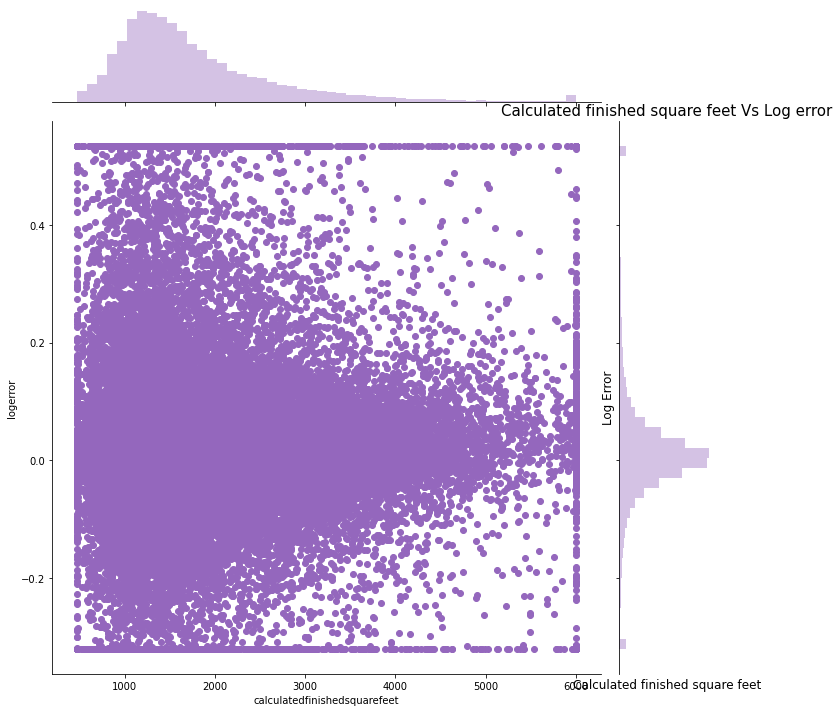

In [49]:
col = "calculatedfinishedsquarefeet"

upper_limit = np.percentile(train_df[col].values, 99.5)
lower_limit = np.percentile(train_df[col].values, 0.5)

train_df.loc[train_df[col] > upper_limit, col] = upper_limit
train_df.loc[train_df[col] < lower_limit, col] = lower_limit

plt.figure(figsize=(12,12))
sns.jointplot(col, 'logerror', data = train_df, size=10, color=color[4])
plt.ylabel('Log Error', fontsize=12)
plt.xlabel('Calculated finished square feet', fontsize=12)
plt.title("Calculated finished square feet Vs Log error", fontsize=15)
plt.show()

Here as well the distribution is very similar to the previous one. No wonder the correlation between the two variables are also high.

In [57]:
train_df['bathroomcnt'].value_counts()

2.0     31575
3.0     17354
1.0     12945
2.5      6607
4.0      3356
1.5      1419
3.5      1036
5.0      1026
4.5       696
0.0       633
6.0       419
5.5       224
7.0       114
8.0       108
6.5        47
9.0        23
7.5        16
10.0        7
8.5         3
11.0        3
13.0        1
18.0        1
Name: bathroomcnt, dtype: int64

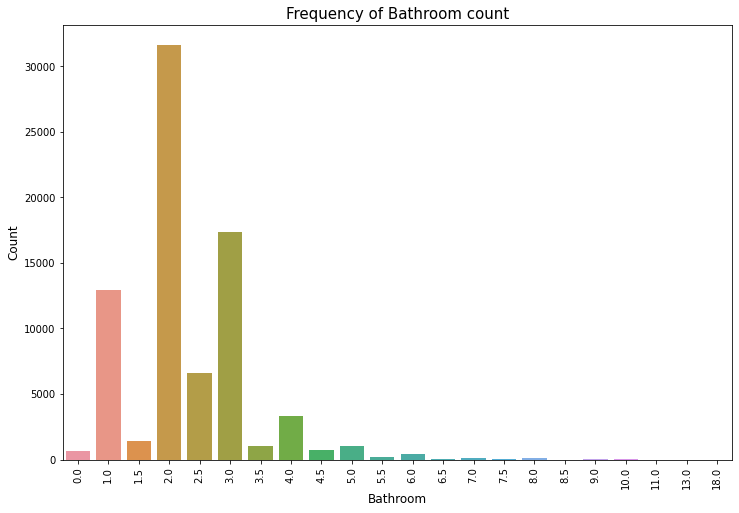

In [50]:
col = "bathroomcnt"

plt.figure(figsize=(12,8))
sns.countplot(x = col, data=train_df)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Bathroom', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Bathroom count", fontsize=15)
plt.show()

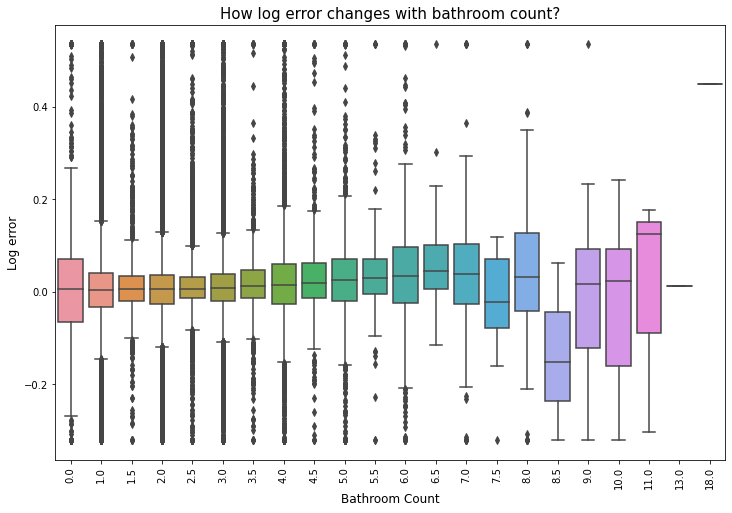

In [61]:
plt.figure(figsize=(12,8))
sns.boxplot(x = col, y='logerror', data=train_df)
plt.ylabel('Log error', fontsize=12)
plt.xlabel('Bathroom Count', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("How log error changes with bathroom count?", fontsize=15)
plt.show()

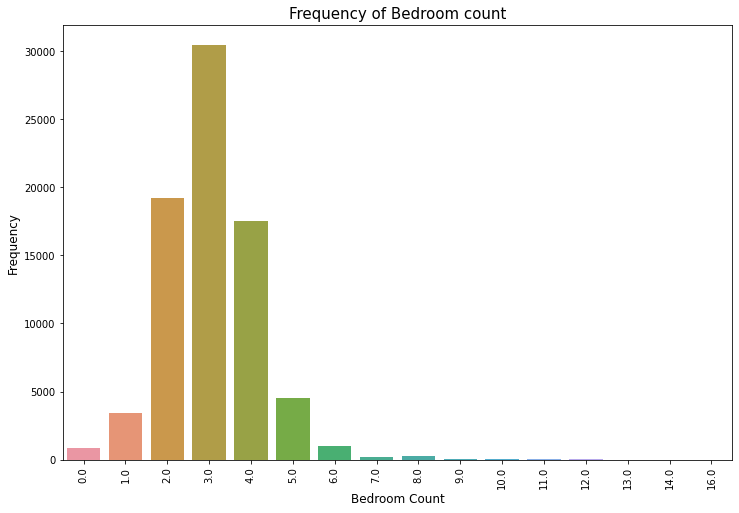

In [63]:
col = "bedroomcnt"

plt.figure(figsize=(12,8))
sns.countplot(col, data = train_df)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Bedroom Count', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Bedroom count", fontsize=15)
plt.show()

In [64]:
train_df.loc[train_df['bedroomcnt'] > 7, 'bedroomcnt'] = 7

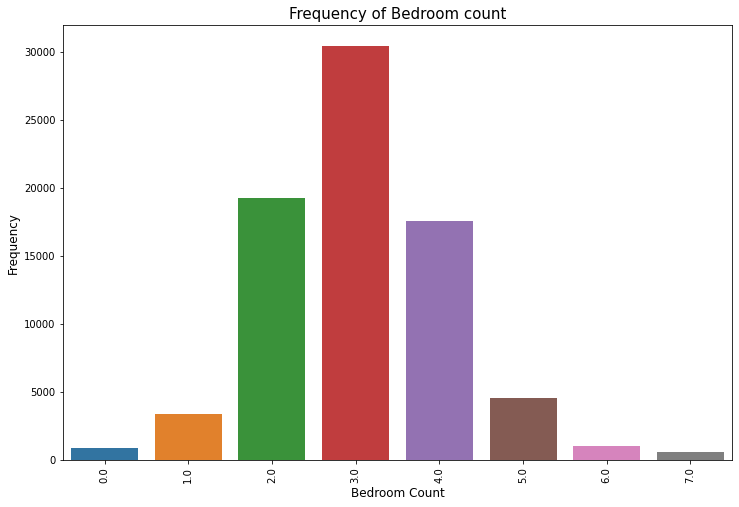

In [65]:
col = "bedroomcnt"

plt.figure(figsize=(12,8))
sns.countplot(col, data = train_df)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Bedroom Count', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Bedroom count", fontsize=15)
plt.show()

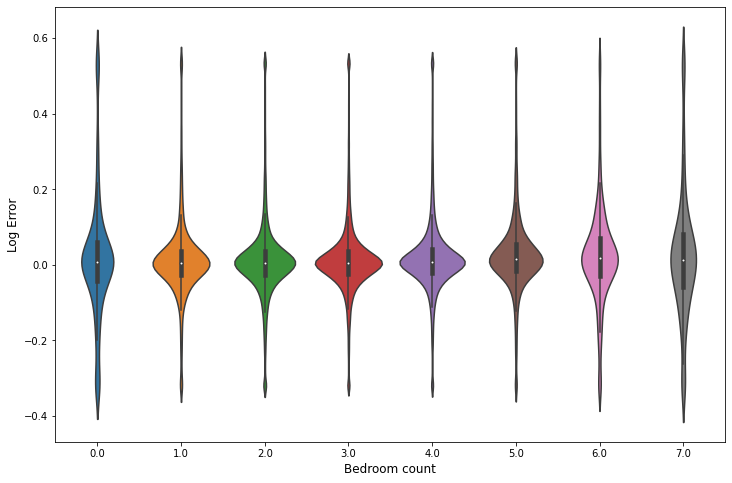

In [66]:
plt.figure(figsize=(12,8))
sns.violinplot(x='bedroomcnt', y='logerror', data=train_df)
plt.xlabel('Bedroom count', fontsize=12)
plt.ylabel('Log Error', fontsize=12)
plt.show()

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:2272: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 864x864 with 0 Axes>

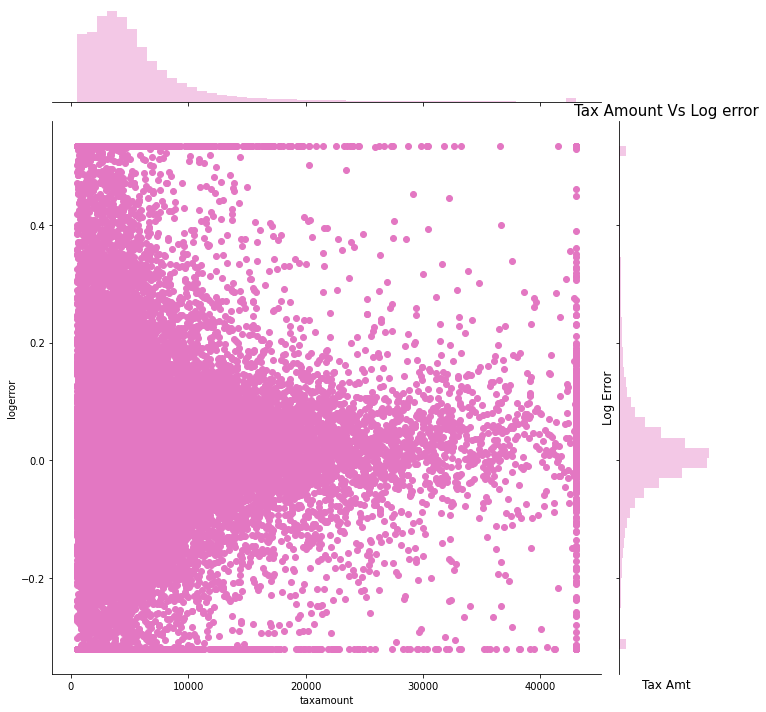

In [67]:
col = "taxamount"

upper_limit = np.percentile(train_df[col].values, 99.5)
lower_limit = np.percentile(train_df[col].values, 0.5)

train_df.loc[train_df[col] > upper_limit, col] = upper_limit
train_df.loc[train_df[col] < lower_limit, col] = lower_limit

plt.figure(figsize=(12,12))
sns.jointplot(col, 'logerror', data = train_df, size=10, color=color[6])
plt.ylabel('Log Error', fontsize=12)
plt.xlabel('Tax Amt', fontsize=12)
plt.title("Tax Amount Vs Log error", fontsize=15)
plt.show()

In [72]:
train_df.columns

Index(['parcelid', 'logerror', 'transactiondate', 'transaction_month',
       'airconditioningtypeid', 'architecturalstyletypeid', 'basementsqft',
       'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructionty

In [73]:
train_y = train_df['logerror'].values
cat_cols = ["hashottuborspa", "propertycountylandusecode", "propertyzoningdesc", "fireplaceflag", "taxdelinquencyflag"]

train_df = train_df.drop(['parcelid', 'logerror', 'transactiondate', 'transaction_month'] + cat_cols, axis=1)

feat_names = train_df.columns

In [74]:
from sklearn import ensemble

model = ensemble.ExtraTreesRegressor(n_estimators=25, max_depth=30, max_features=0.3, n_jobs=-1, random_state=0)
model.fit(train_df, train_y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=30, max_features=0.3, max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=25, n_jobs=-1, oob_score=False, random_state=0,
                    verbose=0, warm_start=False)

In [76]:
model.estimators_

[ExtraTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=30,
                    max_features=0.3, max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, random_state=209652396,
                    splitter='random'),
 ExtraTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=30,
                    max_features=0.3, max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, random_state=398764591,
                    splitter='random'),
 ExtraTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=30,
                    max_features=0.3, max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2

In [77]:
model.feature_importances_

array([1.40445932e-02, 3.41598147e-04, 3.79788033e-04, 1.78007097e-02,
       3.48553318e-02, 2.08580396e-04, 2.84231745e-02, 1.66910070e-02,
       1.24144783e-03, 2.80802728e-03, 5.57186917e-02, 4.94108491e-02,
       3.57651547e-04, 7.39718081e-03, 3.16828831e-03, 2.54782022e-03,
       1.42870232e-03, 6.72020323e-03, 1.65695664e-02, 8.77295825e-03,
       1.12664134e-02, 1.49612295e-02, 5.20316756e-02, 5.21929197e-02,
       5.69106567e-02, 2.27952165e-03, 5.28417031e-04, 1.44635839e-03,
       8.68603832e-04, 1.80781217e-03, 1.41196333e-02, 3.59931960e-02,
       3.09422356e-02, 1.53837648e-03, 3.24702195e-02, 4.13831159e-02,
       9.45021513e-03, 3.48546592e-04, 4.33481567e-03, 3.50085753e-04,
       7.23330989e-03, 3.10200416e-03, 5.32254742e-04, 5.76098737e-02,
       7.19158536e-03, 6.11188263e-02, 5.81740089e-02, 1.63662435e-05,
       5.96042850e-02, 5.69776439e-02, 1.53941844e-02, 3.89354398e-02])

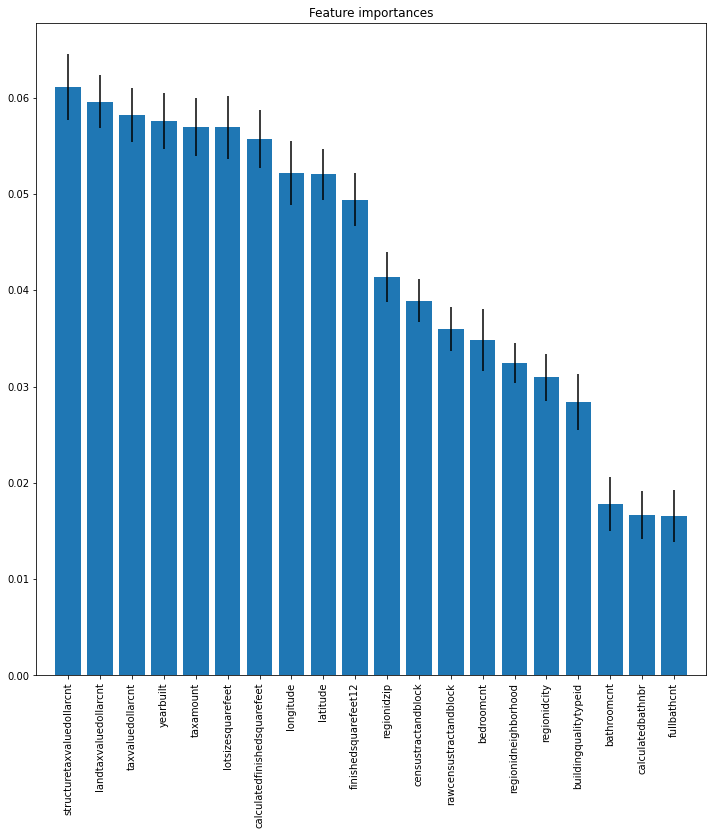

In [79]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:20]

plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], yerr=std[indices], align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

In [ ]:
import xgboost as xgb

xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'silent': 1,
    'seed' : 0
}

dtrain = xgb.DMatrix(train_df, train_y, feature_names=train_df.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=50)


fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()